# BTSvsOTHERS

### Audio Features:

**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

**instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words

**valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [1]:
"""!pip install plotly==2.7.0
!pip install xgboost
!pip install shap
!pip install lightgbm"""

'!pip install plotly==2.7.0\n!pip install xgboost\n!pip install shap\n!pip install lightgbm'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
%pylab inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import sklearn.metrics as mt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import shap

Populating the interactive namespace from numpy and matplotlib


In [3]:
kpopgroups= pd.read_csv("kpop_groups.csv")
df = kpopgroups.copy()
df

Unnamed: 0  danceability  energy  key  speechiness  acousticness  \
0              0         0.566   0.716    1       0.0424       0.00691   
1              1         0.764   0.526   11       0.2120       0.04840   
2              2         0.547   0.605    8       0.0415       0.42000   
3              3         0.703   0.321    4       0.8840       0.86400   
4              4         0.787   0.669    5       0.0428       0.00782   
...          ...           ...     ...  ...          ...           ...   
5979        5979         0.745   0.951    5       0.0527       0.04280   
5980        5980         0.790   0.853   11       0.0665       0.00116   
5981        5981         0.745   0.951    5       0.0527       0.04280   
5982        5982         0.790   0.853   11       0.0666       0.00116   
5983        5983         0.745   0.951    5       0.0527       0.04280   

      instrumentalness  liveness  valence    tempo  loudness  mode  \
0             0.000000    0.3700    0.450   81.068    -5.733     1   
1             0.000000    0.0718    0.588  114.910    -7.355     1   
2             0.000000    0.1250    0.364  121.953    -6.755     1   
3             0.000000    0.9080    0.544  114.822   -13.135     1   
4             0.000000    0.1230    0.570  104.994    -4.333     0   
...                ...       ...      ...      ...       ...   ...   
5979          0.003860    0.2030    0.606  127.945    -2.425     1   
5980          0.000042    0.3290    0.713  124.998    -4.564     0   
5981          0.003860    0.2030    0.606  127.957    -2.425     1   
5982          0.000042    0.3290    0.713  125.000    -4.564     0   
5983          0.003860    0.2030    0.606  127.945    -2.425     1   

      duration_ms  time_signature artist_name release_date  \
0          207481               4         BTS   2020-11-20   
1          222243               4         BTS   2020-11-20   
2          254950               4         BTS   2020-11-20   
3          179548               4         BTS   2020-11-20   
4          202313               4         BTS   2020-11-20   
...           ...             ...         ...          ...   
5979       200303               4        ITZY   2019-02-14   
5980       199874               4        ITZY   2019-02-12   
5981       200303               4        ITZY   2019-02-12   
5982       199874               4        ITZY   2019-02-12   
5983       200303               4        ITZY   2019-02-12   

               song_name song_name_formatted  
0           Life Goes On        life-goes-on  
1         Fly To My Room      fly-to-my-room  
2            Blue & Grey           blue-grey  
3                   Skit                skit  
4              Telepathy           telepathy  
...                  ...                 ...  
5979            WANT IT?                want  
5980  달라달라 (DALLA DALLA)                 NaN  
5981            WANT IT?                want  
5982  달라달라 (DALLA DALLA)                 NaN  
5983            WANT IT?                want  

[5984 rows x 18 columns]

In [4]:
df = df.drop(columns=["Unnamed: 0"])
df

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0            0.566   0.716    1       0.0424       0.00691          0.000000   
1            0.764   0.526   11       0.2120       0.04840          0.000000   
2            0.547   0.605    8       0.0415       0.42000          0.000000   
3            0.703   0.321    4       0.8840       0.86400          0.000000   
4            0.787   0.669    5       0.0428       0.00782          0.000000   
...            ...     ...  ...          ...           ...               ...   
5979         0.745   0.951    5       0.0527       0.04280          0.003860   
5980         0.790   0.853   11       0.0665       0.00116          0.000042   
5981         0.745   0.951    5       0.0527       0.04280          0.003860   
5982         0.790   0.853   11       0.0666       0.00116          0.000042   
5983         0.745   0.951    5       0.0527       0.04280          0.003860   

      liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0       0.3700    0.450   81.068    -5.733     1       207481               4   
1       0.0718    0.588  114.910    -7.355     1       222243               4   
2       0.1250    0.364  121.953    -6.755     1       254950               4   
3       0.9080    0.544  114.822   -13.135     1       179548               4   
4       0.1230    0.570  104.994    -4.333     0       202313               4   
...        ...      ...      ...       ...   ...          ...             ...   
5979    0.2030    0.606  127.945    -2.425     1       200303               4   
5980    0.3290    0.713  124.998    -4.564     0       199874               4   
5981    0.2030    0.606  127.957    -2.425     1       200303               4   
5982    0.3290    0.713  125.000    -4.564     0       199874               4   
5983    0.2030    0.606  127.945    -2.425     1       200303               4   

     artist_name release_date           song_name song_name_formatted  
0            BTS   2020-11-20        Life Goes On        life-goes-on  
1            BTS   2020-11-20      Fly To My Room      fly-to-my-room  
2            BTS   2020-11-20         Blue & Grey           blue-grey  
3            BTS   2020-11-20                Skit                skit  
4            BTS   2020-11-20           Telepathy           telepathy  
...          ...          ...                 ...                 ...  
5979        ITZY   2019-02-14            WANT IT?                want  
5980        ITZY   2019-02-12  달라달라 (DALLA DALLA)                 NaN  
5981        ITZY   2019-02-12            WANT IT?                want  
5982        ITZY   2019-02-12  달라달라 (DALLA DALLA)                 NaN  
5983        ITZY   2019-02-12            WANT IT?                want  

[5984 rows x 17 columns]

In [5]:
year = df["release_date"].apply(lambda x: x.split('-')[0])
df.insert(15,"year",year)

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['artist_name'] = [i.lower().replace("'", '') for i in df.artist_name]

In [7]:
df.describe().T

count           mean           std           min  \
danceability      5984.0       0.653703      0.123452      0.000000   
energy            5984.0       0.759343      0.161465      0.002770   
key               5984.0       5.380515      3.543256      0.000000   
speechiness       5984.0       0.096219      0.089620      0.000000   
acousticness      5984.0       0.180083      0.215273      0.000005   
instrumentalness  5984.0       0.042525      0.177240      0.000000   
liveness          5984.0       0.225994      0.200193      0.010800   
valence           5984.0       0.550064      0.207912      0.000000   
tempo             5984.0     121.608275     25.732910      0.000000   
loudness          5984.0      -4.741049      2.302029    -27.191000   
mode              5984.0       0.569686      0.495161      0.000000   
duration_ms       5984.0  209547.997828  38231.198723  12640.000000   
time_signature    5984.0       3.970588      0.232286      0.000000   

                            25%          50%            75%         max  
danceability           0.582000       0.6690       0.739000       0.958  
energy                 0.681750       0.8030       0.876000       0.995  
key                    2.000000       6.0000       8.000000      11.000  
speechiness            0.043200       0.0662       0.113000       0.936  
acousticness           0.027475       0.0933       0.244250       0.995  
instrumentalness       0.000000       0.0000       0.000002       0.965  
liveness               0.094175       0.1440       0.306000       0.980  
valence                0.390000       0.5590       0.710250       0.978  
tempo                102.728000     120.0715     136.072750     216.146  
loudness              -5.527000      -4.4100      -3.278500       0.039  
mode                   0.000000       1.0000       1.000000       1.000  
duration_ms       192568.750000  209875.0000  228293.250000  588120.000  
time_signature         4.000000       4.0000       4.000000       5.000

In [8]:
df.columns

Index(['danceability', 'energy', 'key', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness', 'mode',
       'duration_ms', 'time_signature', 'artist_name', 'release_date', 'year',
       'song_name', 'song_name_formatted'],
      dtype='object')

In [9]:
df.isnull().sum()

danceability             0
energy                   0
key                      0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
loudness                 0
mode                     0
duration_ms              0
time_signature           0
artist_name              0
release_date             0
year                     0
song_name                0
song_name_formatted    675
dtype: int64

In [10]:
df.artist_name.value_counts()

bts                 994
blackpink           502
winner              500
girls generation    494
exo                 418
twice               410
nct 127             369
got7                360
red velvet          300
stray kids          273
gfriend             270
monsta x            265
mamamoo             236
exid                187
astro               163
itzy                155
everglow             51
wanna one            37
Name: artist_name, dtype: int64

In [11]:
key_mapping = {0: 'C', 1: 'C♯,D♭', 2: 'D', 3: 'D♯,E♭', 4: 'E', 5: 'F', 6: 'F♯,G♭', 7: 'G', 8: 'G♯,A♭', 9: 'A', 10: 'A♯,B♭', 11: 'B'}
key= df['key'].map(key_mapping)
key.head()

0    C♯,D♭
1        B
2    G♯,A♭
3        E
4        F
Name: key, dtype: object

In [12]:
time_mapping = {0:'0/4', 1: '1/4', 2: '2/4', 3: '3/4', 4: '4/4', 5: '5/4'}
time_signature = df['time_signature'].map(time_mapping)
time_signature.head()

0    4/4
1    4/4
2    4/4
3    4/4
4    4/4
Name: time_signature, dtype: object

In [13]:
mode = {0:'minor', 1: 'major'}
mode = df['mode'].map(mode)
mode.head()

0    major
1    major
2    major
3    major
4    minor
Name: mode, dtype: object

In [14]:
df.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.566   0.716    1       0.0424       0.00691               0.0   
1         0.764   0.526   11       0.2120       0.04840               0.0   
2         0.547   0.605    8       0.0415       0.42000               0.0   
3         0.703   0.321    4       0.8840       0.86400               0.0   
4         0.787   0.669    5       0.0428       0.00782               0.0   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.3700    0.450   81.068    -5.733     1       207481               4   
1    0.0718    0.588  114.910    -7.355     1       222243               4   
2    0.1250    0.364  121.953    -6.755     1       254950               4   
3    0.9080    0.544  114.822   -13.135     1       179548               4   
4    0.1230    0.570  104.994    -4.333     0       202313               4   

  artist_name release_date  year       song_name song_name_formatted  
0         bts   2020-11-20  2020    Life Goes On        life-goes-on  
1         bts   2020-11-20  2020  Fly To My Room      fly-to-my-room  
2         bts   2020-11-20  2020     Blue & Grey           blue-grey  
3         bts   2020-11-20  2020            Skit                skit  
4         bts   2020-11-20  2020       Telepathy           telepathy

Text(0.5, 0.98, 'All K-Pop Groups')

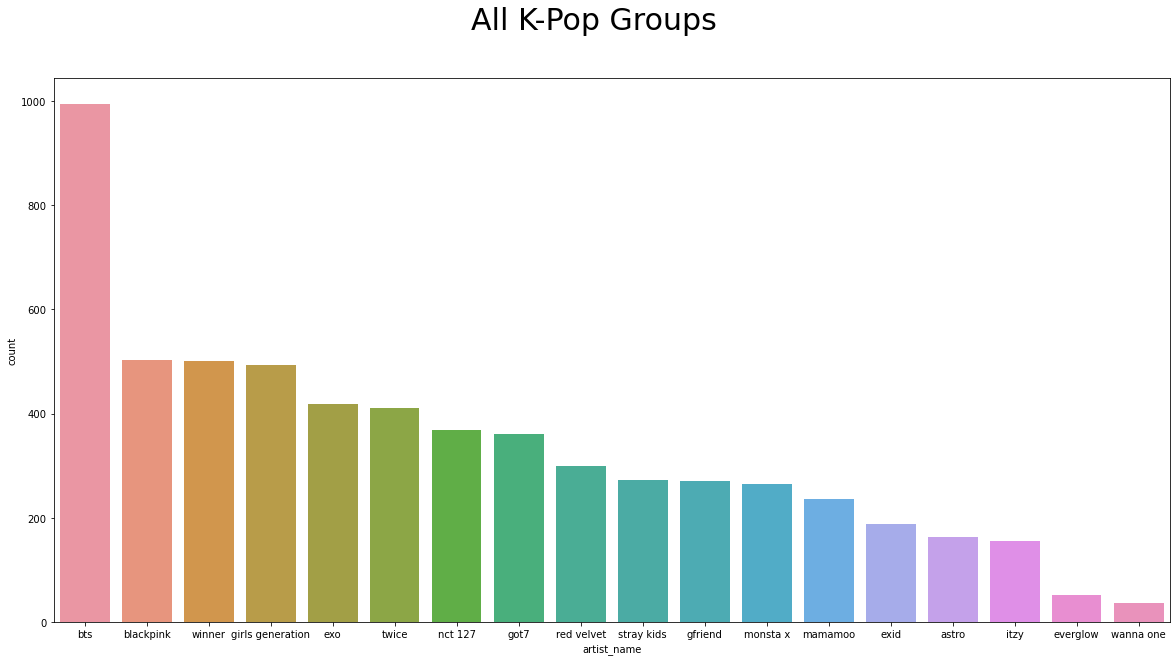

In [15]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'artist_name', data=df, order=df['artist_name'].value_counts().index);
suptitle("All K-Pop Groups", size=30)

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


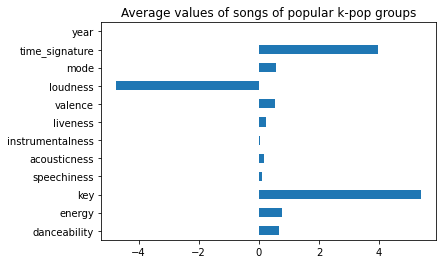

In [16]:
table = df.drop(["duration_ms","tempo"], axis=1)
table.mean().plot.barh().set_title("Average values of songs of popular k-pop groups");

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


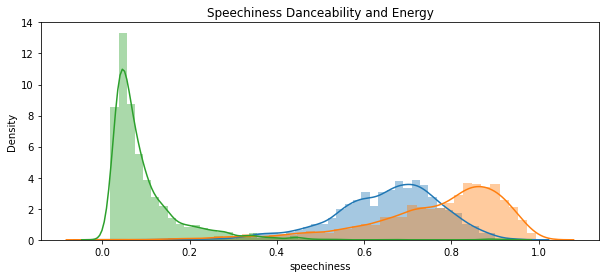

In [17]:
plt.figure(figsize=(10,4))
sns.distplot(df['danceability']); #the blue one
sns.distplot(df['energy']); #the orange one
sns.distplot(df['speechiness']).set_title("Speechiness Danceability and Energy"); #the green one

Text(0.5, 0.98, 'Overview All Features')

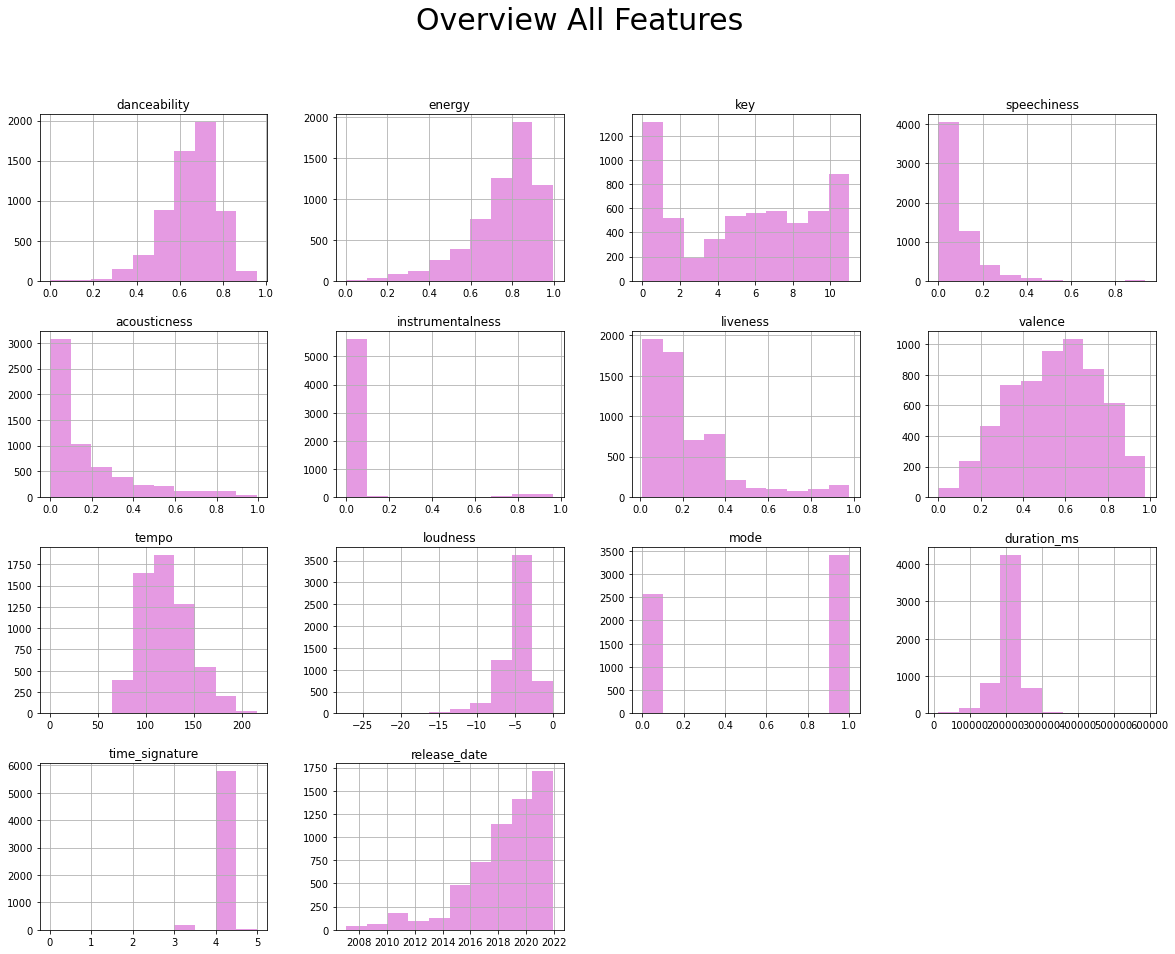

In [18]:
figure = figsize(20,15)
df.hist(alpha = 0.7, color="orchid");
suptitle("Overview All Features", size=30)

Text(0.5, 0.98, 'Mode')

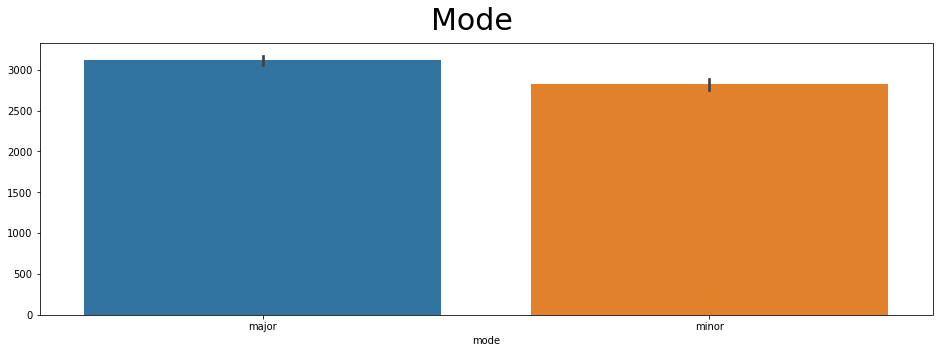

In [19]:
plt.figure(figsize = (16,5))
sns.barplot(x=mode, y=mode.index, data=df);
suptitle("Mode", size=30)

Text(0.5, 0.98, 'Time Signature')

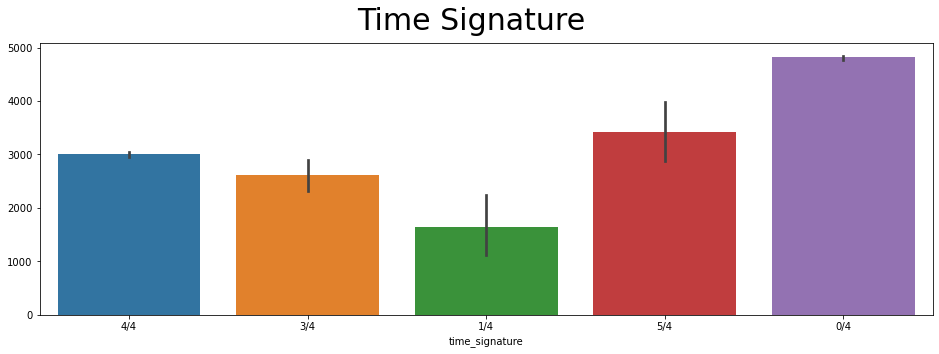

In [20]:
plt.figure(figsize = (16,5))
sns.barplot(x=time_signature, y=time_signature.index, data=df);
suptitle("Time Signature", size=30)

Text(0.5, 0.98, 'Keys')

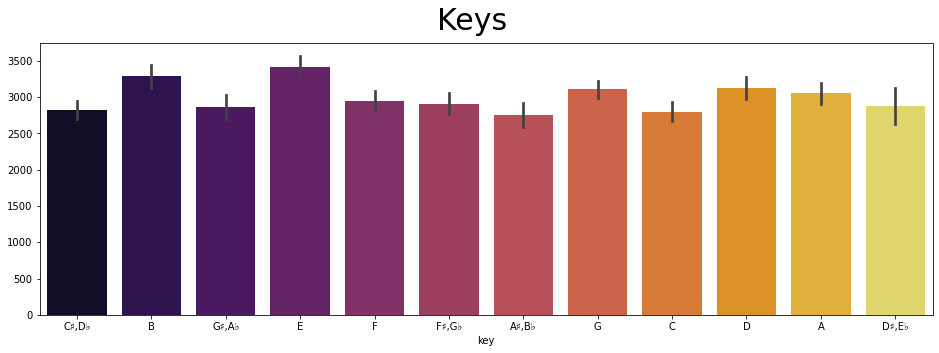

In [21]:
plt.figure(figsize = (16,5))
sns.barplot(x=key, y=key.index, data=df, palette="inferno");
suptitle("Keys", size=30)

In [22]:
df.corr()

danceability    energy       key  speechiness  acousticness  \
danceability          1.000000  0.202751  0.040171    -0.065743     -0.253472   
energy                0.202751  1.000000  0.037158     0.113372     -0.590077   
key                   0.040171  0.037158  1.000000     0.033211     -0.054913   
speechiness          -0.065743  0.113372  0.033211     1.000000     -0.054525   
acousticness         -0.253472 -0.590077 -0.054913    -0.054525      1.000000   
instrumentalness     -0.105600 -0.250540 -0.012638    -0.101673      0.106138   
liveness             -0.160284  0.155644 -0.008362     0.104471      0.009281   
valence               0.475630  0.435548  0.042249     0.046202     -0.234692   
tempo                -0.108210  0.096240  0.020201     0.077879     -0.065891   
loudness              0.233581  0.734630  0.003312    -0.097021     -0.416909   
mode                 -0.117193 -0.120867 -0.153774    -0.065988      0.131610   
duration_ms          -0.127039  0.013664 -0.023826    -0.108418      0.014307   
time_signature        0.162976  0.098785  0.031267    -0.041829     -0.091460   

                  instrumentalness  liveness   valence     tempo  loudness  \
danceability             -0.105600 -0.160284  0.475630 -0.108210  0.233581   
energy                   -0.250540  0.155644  0.435548  0.096240  0.734630   
key                      -0.012638 -0.008362  0.042249  0.020201  0.003312   
speechiness              -0.101673  0.104471  0.046202  0.077879 -0.097021   
acousticness              0.106138  0.009281 -0.234692 -0.065891 -0.416909   
instrumentalness          1.000000 -0.069301 -0.175101 -0.003926 -0.390787   
liveness                 -0.069301  1.000000 -0.050885 -0.024019 -0.041880   
valence                  -0.175101 -0.050885  1.000000  0.060805  0.393932   
tempo                    -0.003926 -0.024019  0.060805  1.000000  0.068626   
loudness                 -0.390787 -0.041880  0.393932  0.068626  1.000000   
mode                      0.045916 -0.005610 -0.103792  0.073971 -0.075426   
duration_ms              -0.200721  0.028965 -0.080973  0.029710  0.083923   
time_signature           -0.005213  0.000565  0.109290  0.039527  0.118787   

                      mode  duration_ms  time_signature  
danceability     -0.117193    -0.127039        0.162976  
energy           -0.120867     0.013664        0.098785  
key              -0.153774    -0.023826        0.031267  
speechiness      -0.065988    -0.108418       -0.041829  
acousticness      0.131610     0.014307       -0.091460  
instrumentalness  0.045916    -0.200721       -0.005213  
liveness         -0.005610     0.028965        0.000565  
valence          -0.103792    -0.080973        0.109290  
tempo             0.073971     0.029710        0.039527  
loudness         -0.075426     0.083923        0.118787  
mode              1.000000     0.026401       -0.009787  
duration_ms       0.026401     1.000000        0.099706  
time_signature   -0.009787     0.099706        1.000000

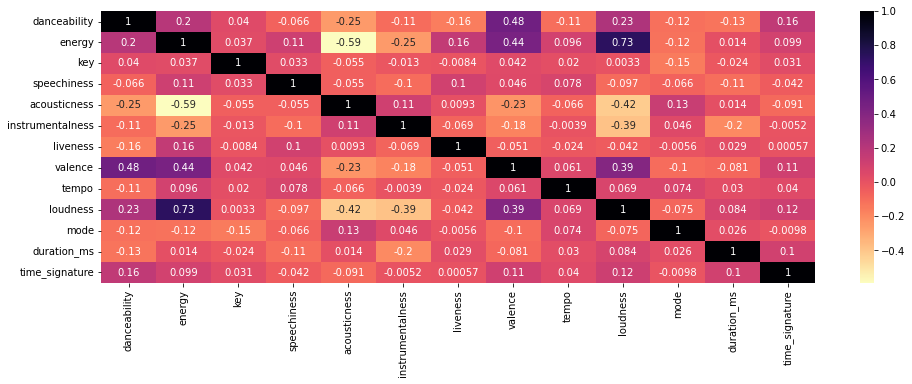

In [23]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), cmap="magma_r", annot=True);

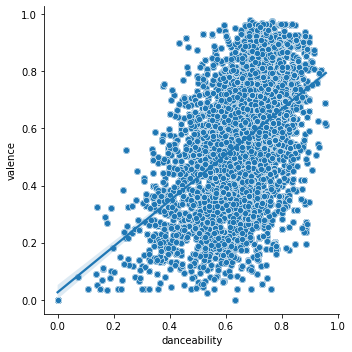

In [24]:
sns.lmplot(x="danceability",y="valence", data=df);
sns.scatterplot(x="danceability",y="valence", data=df);

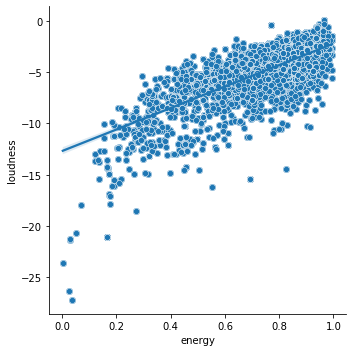

In [25]:
sns.lmplot(x="energy",y="loudness", data=df);
sns.scatterplot(x="energy",y="loudness", data=df);

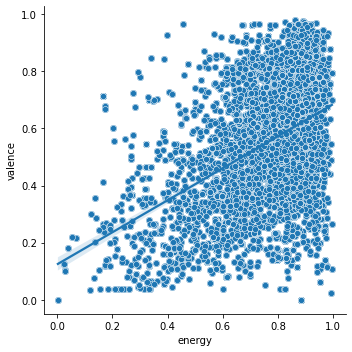

In [26]:
sns.lmplot(x="energy",y="valence", data=df);
sns.scatterplot(x="energy",y="valence", data=df);

In [27]:
df.groupby('artist_name').agg({'speechiness':'mean', 'instrumentalness':'mean', 'danceability':'mean', 'energy':'mean','acousticness':'mean'}).sort_values('speechiness', ascending = False)

speechiness  instrumentalness  danceability    energy  \
artist_name                                                               
bts                  0.140292          0.005332      0.607638  0.763520   
stray kids           0.123945          0.019142      0.682117  0.808604   
astro                0.113485          0.025149      0.665245  0.717318   
monsta x             0.113213          0.011062      0.662698  0.786596   
nct 127              0.103005          0.031032      0.661843  0.766117   
mamamoo              0.091409          0.031082      0.640428  0.720699   
blackpink            0.090646          0.014259      0.664980  0.707219   
wanna one            0.090505          0.000000      0.601189  0.777432   
itzy                 0.089586          0.095339      0.775387  0.821787   
exo                  0.087491          0.026118      0.621045  0.780778   
got7                 0.085426          0.019951      0.700694  0.778833   
red velvet           0.083798          0.101727      0.631260  0.711803   
twice                0.080698          0.028084      0.722780  0.802729   
winner               0.079064          0.003386      0.642450  0.740734   
exid                 0.070910          0.131959      0.675412  0.759663   
girls generation     0.070435          0.054738      0.663149  0.785112   
gfriend              0.058144          0.247166      0.603519  0.709930   
everglow             0.055478          0.312075      0.593176  0.657784   

                  acousticness  
artist_name                     
bts                   0.111164  
stray kids            0.100678  
astro                 0.202674  
monsta x              0.132459  
nct 127               0.158400  
mamamoo               0.365692  
blackpink             0.160491  
wanna one             0.181265  
itzy                  0.065938  
exo                   0.184433  
got7                  0.136182  
red velvet            0.236088  
twice                 0.152908  
winner                0.241950  
exid                  0.214600  
girls generation      0.244338  
gfriend               0.265350  
everglow              0.316899

In [28]:
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df["artist_name"] + " - " + df["song_name"]
text2 = text1.values

X = df[chosen].values
y = df["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

In [29]:
chosen = ["energy", "liveness", "tempo", "valence"]
text1 = df["artist_name"] + " - " + df["song_name"]
text2 = text1.values

X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)

X = pca.transform(X)

fig = {
    "data": [
        {
            "x": X[:, 0],
            "y": X[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": "8", "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "How hard is this to dance to?"},
        "yaxis": {"title": "How metal is this?"}
    }
}

py.iplot(fig, filename="test-graph2")

In [30]:
import time

chosen = ["energy", "liveness", "tempo", "valence", "loudness",
          "speechiness", "acousticness", "danceability", "instrumentalness"]

X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": "8", "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5984 samples in 0.019s...
[t-SNE] Computed neighbors for 5984 samples in 0.664s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5984
[t-SNE] Computed conditional probabilities for sample 2000 / 5984
[t-SNE] Computed conditional probabilities for sample 3000 / 5984
[t-SNE] Computed conditional probabilities for sample 4000 / 5984
[t-SNE] Computed conditional probabilities for sample 5000 / 5984
[t-SNE] Computed conditional probabilities for sample 5984 / 5984
[t-SNE] Mean sigma: 0.094457
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.086136
[t-SNE] KL divergence after 300 iterations: 2.133900
Time elapsed: 9.202195882797241 seconds


## Target Assignment

In [31]:
df['target'] = [1 if i == 'bts' else 0 for i in df.artist_name]
df["target"]

0       1
1       1
2       1
3       1
4       1
       ..
5979    0
5980    0
5981    0
5982    0
5983    0
Name: target, Length: 5984, dtype: int64

Text(0.5, 1.0, 'Target Based on Mode and Key')

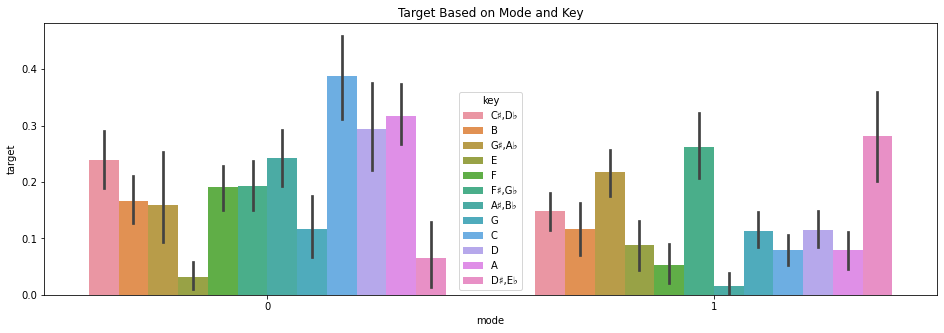

In [32]:
plt.figure(figsize = (16,5))
sns.barplot(x = 'mode', y = 'target', hue = key, data = df);
plt.title('Target Based on Mode and Key')

In [33]:
bts=df[df["target"]==1]
bts.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.566   0.716    1       0.0424       0.00691               0.0   
1         0.764   0.526   11       0.2120       0.04840               0.0   
2         0.547   0.605    8       0.0415       0.42000               0.0   
3         0.703   0.321    4       0.8840       0.86400               0.0   
4         0.787   0.669    5       0.0428       0.00782               0.0   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.3700    0.450   81.068    -5.733     1       207481               4   
1    0.0718    0.588  114.910    -7.355     1       222243               4   
2    0.1250    0.364  121.953    -6.755     1       254950               4   
3    0.9080    0.544  114.822   -13.135     1       179548               4   
4    0.1230    0.570  104.994    -4.333     0       202313               4   

  artist_name release_date  year       song_name song_name_formatted  target  
0         bts   2020-11-20  2020    Life Goes On        life-goes-on       1  
1         bts   2020-11-20  2020  Fly To My Room      fly-to-my-room       1  
2         bts   2020-11-20  2020     Blue & Grey           blue-grey       1  
3         bts   2020-11-20  2020            Skit                skit       1  
4         bts   2020-11-20  2020       Telepathy           telepathy       1

In [34]:
others=df[df["target"]==0]
others.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
994         0.163   0.951    2       0.1960        0.0489            0.0228   
995         0.613   0.959    2       0.1020        0.3920            0.0000   
996         0.473   0.977   10       0.3500        0.1310            0.0000   
997         0.637   0.937   10       0.1240        0.0428            0.0000   
998         0.562   0.866   11       0.0685        0.0797            0.0000   

     liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
994     0.332    0.108   75.942    -4.524     1        65573               4   
995     0.354    0.282  116.012    -2.679     1       225120               4   
996     0.539    0.524  175.810    -3.180     0       224560               4   
997     0.756    0.330  117.989    -2.355     0       240587               4   
998     0.902    0.469   83.976    -3.118     0       200560               4   

    artist_name release_date  year           song_name song_name_formatted  \
994         exo   2020-04-21  2020  EXplOration - Live                live   
995         exo   2020-04-21  2020        Tempo - Live          tempo-live   
996         exo   2020-04-21  2020  Transformer - Live    transformer-live   
997         exo   2020-04-21  2020      Gravity - Live        gravity-live   
998         exo   2020-04-21  2020         Sign - Live           sign-live   

     target  
994       0  
995       0  
996       0  
997       0  
998       0

Text(0.5, 0.98, 'Overview All Song Features (BTS)')

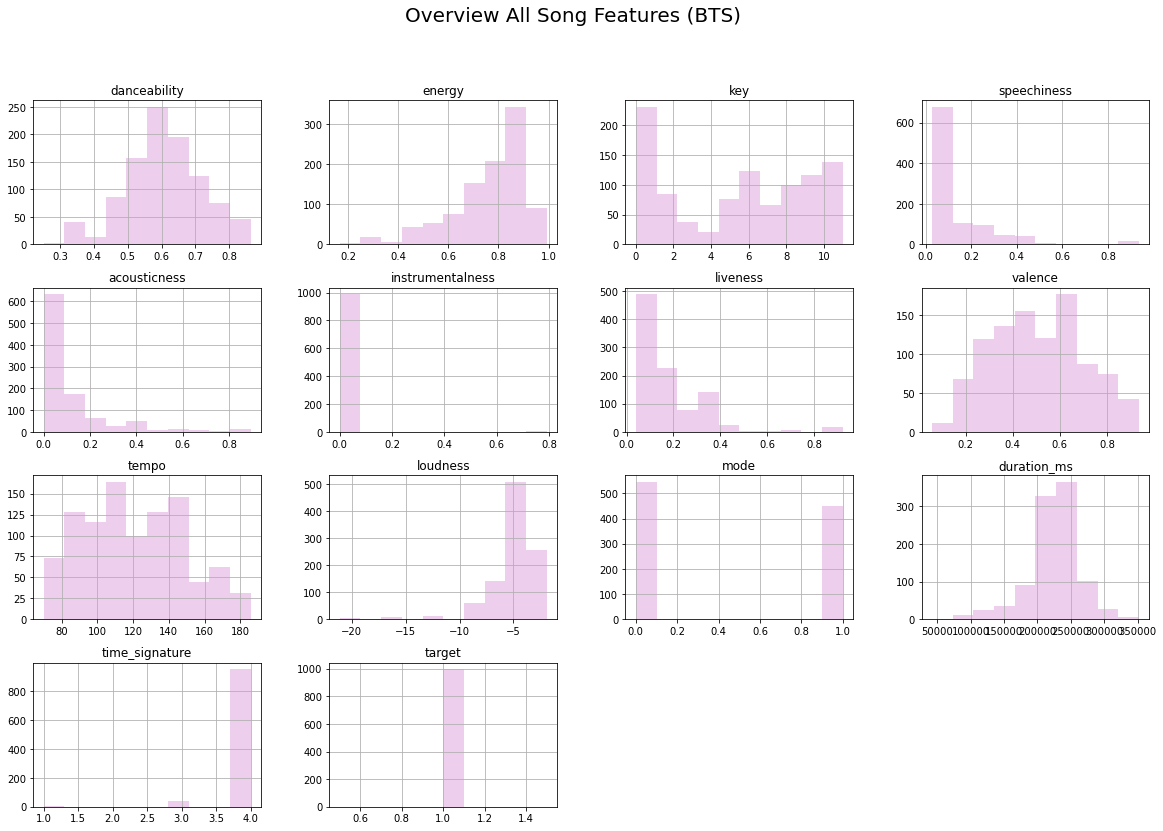

In [35]:
figure = figsize(20,13)
bts._get_numeric_data().hist(alpha = 0.5, color="plum");
suptitle("Overview All Song Features (BTS)", size=20)

Text(0.5, 0.98, 'Overview All Song Features (Other Groups)')

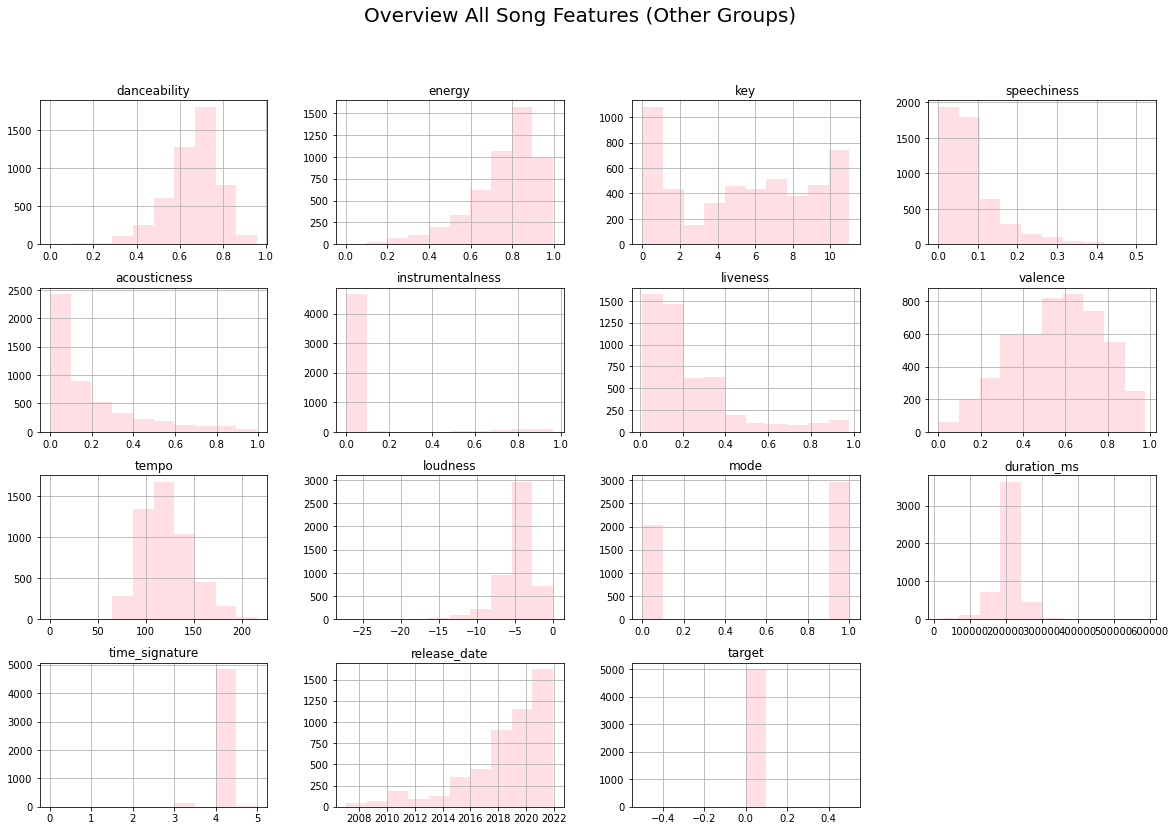

In [36]:
figure = figsize(20,13)
others.hist(alpha = 0.5, color="pink");
suptitle("Overview All Song Features (Other Groups)", size=20)

In [37]:
df.corr()['target'].sort_values()

danceability       -0.166554
acousticness       -0.142900
mode               -0.106347
instrumentalness   -0.093666
liveness           -0.091438
valence            -0.091300
loudness           -0.074586
time_signature     -0.044008
tempo              -0.017158
key                 0.005927
energy              0.011547
duration_ms         0.162931
speechiness         0.219510
target              1.000000
Name: target, dtype: float64

In [38]:
df = df.drop(columns=["release_date","song_name_formatted","song_name","artist_name","year"])

## Splitting Data-Set

In [39]:
y = df.target
X = df.drop("target",axis=1)

In [40]:
#X, y

In [41]:
X.shape, y.shape

((5984, 13), (5984,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state = 420)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (4188, 13)
X_test shape: (1796, 13)


## Creating Models

In [43]:
all_performances = pd.DataFrame()
list_clf_name = []
list_pred = []
list_model = []

In [44]:
def fit_model(model):
    X_model = model.fit(X_train,y_train)
    return X_model

In [45]:
def add_list(name, model, y_pred):
    global list_clf_name, list_pred, list_model, list_x_test
    list_clf_name.append(name)
    list_model.append(model)
    list_pred.append(y_pred)

In [46]:
def add_all_performances(name, training_set_score, test_set_score, precision, recall, f1_score, AUC):
    global all_performances
    models = pd.DataFrame([[name, training_set_score, test_set_score, precision, recall, f1_score, AUC]],
                         columns=["model_name","training_set_score", "test_set_score",
                                  "precision", "recall", "f1_score", "AUC"])
    all_performances = all_performances.append(models, ignore_index=True)
    all_performances= all_performances.drop_duplicates()

In [47]:
def model_performance(model):

    name= model.__class__.__name__
    x_model = fit_model(model)
    y_pred = x_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    training_set_score= x_model.score(X_train, y_train)
    test_set_score = x_model.score(X_test, y_test)
    precision = mt.precision_score(y_test,y_pred)
    recall = mt.recall_score(y_test,y_pred)
    f1_score= mt.f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    add_list(name, model, y_pred)
    add_all_performances(name, training_set_score, test_set_score, precision, recall, f1_score, AUC)
    
    print("Training Score: ", training_set_score)
    print("Test Score: ", test_set_score)
    print("AUC: " , AUC,"\n")
    print(classification_report(y_test, y_pred))

In [48]:
random_forest_model = RandomForestClassifier()
model_performance(random_forest_model)

Training Score:  1.0
Test Score:  0.9927616926503341
AUC:  0.9793650793650794 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1481
           1       1.00      0.96      0.98       315

    accuracy                           0.99      1796
   macro avg       1.00      0.98      0.99      1796
weighted avg       0.99      0.99      0.99      1796



In [49]:
knn_model = KNeighborsClassifier()
model_performance(knn_model)

Training Score:  0.9410219675262655
Test Score:  0.9136971046770601
AUC:  0.8751883647899852 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1481
           1       0.73      0.82      0.77       315

    accuracy                           0.91      1796
   macro avg       0.84      0.88      0.86      1796
weighted avg       0.92      0.91      0.92      1796



In [50]:
decision_tree_model = DecisionTreeClassifier()
model_performance(decision_tree_model)

Training Score:  1.0
Test Score:  0.9716035634743875
AUC:  0.9702849854774231 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1481
           1       0.88      0.97      0.92       315

    accuracy                           0.97      1796
   macro avg       0.94      0.97      0.95      1796
weighted avg       0.97      0.97      0.97      1796



In [51]:
XGB_model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
model_performance(XGB_model)

[11:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score:  0.9765998089780324
Test Score:  0.9593541202672605
AUC:  0.9028723620891075 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1481
           1       0.94      0.82      0.88       315

    accuracy                           0.96      1796
   macro avg       0.95      0.90      0.93      1796
weighted avg       0.96      0.96      0.96      1796



The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [52]:
LGB_model = lgb.LGBMClassifier()
model_performance(LGB_model)

Training Score:  1.0
Test Score:  0.9922048997772829
AUC:  0.980277161506061 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1481
           1       0.99      0.96      0.98       315

    accuracy                           0.99      1796
   macro avg       0.99      0.98      0.99      1796
weighted avg       0.99      0.99      0.99      1796



In [53]:
GCB_model = GradientBoostingClassifier()
model_performance(GCB_model)

Training Score:  0.9558261700095511
Test Score:  0.9376391982182628
AUC:  0.8509651350974782 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1481
           1       0.91      0.72      0.80       315

    accuracy                           0.94      1796
   macro avg       0.93      0.85      0.88      1796
weighted avg       0.94      0.94      0.93      1796



## Comparing Performances

In [54]:
def display_all_confusion_matrices():
    f, ax = plt.subplots(2,3, figsize=(10,10), sharey='row')
    ax = ax.flatten()

    for i in range(6):
        cf_matrix = confusion_matrix(y_test, list_pred[i])
        disp = ConfusionMatrixDisplay(cf_matrix)
        disp.plot(ax=ax[i], xticks_rotation=45)
        disp.ax_.set_title(list_clf_name[i]+"\nAccuracy:{accuracy:.4f}\nAUC:{auc:.4f}"
                           .format(accuracy= accuracy_score(y_test, list_pred[i]),auc= roc_auc_score(y_test, list_pred[i])),
                             fontsize=14)
        disp.im_.colorbar.remove()
        disp.ax_.set_xlabel('')
        if i!=0:
            disp.ax_.set_ylabel('')


    f.text(0.4, 0.1, 'Predicted label', ha='left')
    plt.subplots_adjust()
    f.colorbar(disp.im_)
    plt.show()

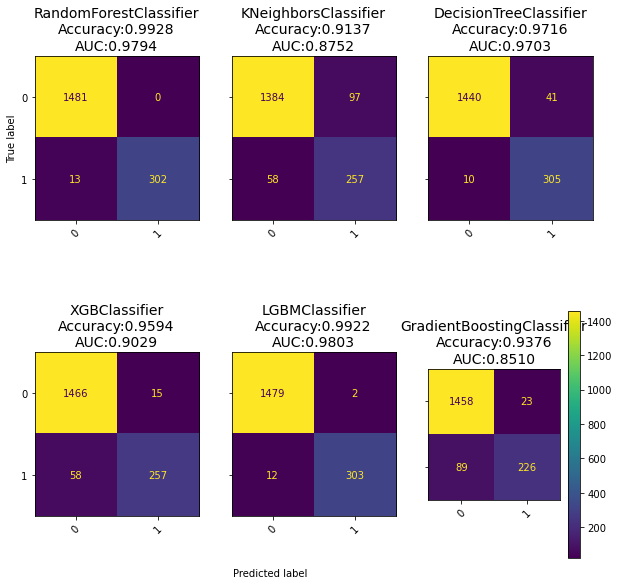

In [55]:
display_all_confusion_matrices()

In [56]:
all_performances.sort_values(by=['test_set_score'], ascending=False)

model_name  training_set_score  test_set_score  precision  \
0      RandomForestClassifier            1.000000        0.992762   1.000000   
4              LGBMClassifier            1.000000        0.992205   0.993443   
2      DecisionTreeClassifier            1.000000        0.971604   0.881503   
3               XGBClassifier            0.976600        0.959354   0.944853   
5  GradientBoostingClassifier            0.955826        0.937639   0.907631   
1        KNeighborsClassifier            0.941022        0.913697   0.725989   

     recall  f1_score       AUC  
0  0.958730  0.978930  0.979365  
4  0.961905  0.977419  0.980277  
2  0.968254  0.922844  0.970285  
3  0.815873  0.875639  0.902872  
5  0.717460  0.801418  0.850965  
1  0.815873  0.768311  0.875188

In [57]:
all_performances.sort_values(by=['AUC'], ascending=False)

model_name  training_set_score  test_set_score  precision  \
4              LGBMClassifier            1.000000        0.992205   0.993443   
0      RandomForestClassifier            1.000000        0.992762   1.000000   
2      DecisionTreeClassifier            1.000000        0.971604   0.881503   
3               XGBClassifier            0.976600        0.959354   0.944853   
1        KNeighborsClassifier            0.941022        0.913697   0.725989   
5  GradientBoostingClassifier            0.955826        0.937639   0.907631   

     recall  f1_score       AUC  
4  0.961905  0.977419  0.980277  
0  0.958730  0.978930  0.979365  
2  0.968254  0.922844  0.970285  
3  0.815873  0.875639  0.902872  
1  0.815873  0.768311  0.875188  
5  0.717460  0.801418  0.850965

In [58]:
all_performances.sort_values(by=['f1_score'], ascending=False)

model_name  training_set_score  test_set_score  precision  \
0      RandomForestClassifier            1.000000        0.992762   1.000000   
4              LGBMClassifier            1.000000        0.992205   0.993443   
2      DecisionTreeClassifier            1.000000        0.971604   0.881503   
3               XGBClassifier            0.976600        0.959354   0.944853   
5  GradientBoostingClassifier            0.955826        0.937639   0.907631   
1        KNeighborsClassifier            0.941022        0.913697   0.725989   

     recall  f1_score       AUC  
0  0.958730  0.978930  0.979365  
4  0.961905  0.977419  0.980277  
2  0.968254  0.922844  0.970285  
3  0.815873  0.875639  0.902872  
5  0.717460  0.801418  0.850965  
1  0.815873  0.768311  0.875188

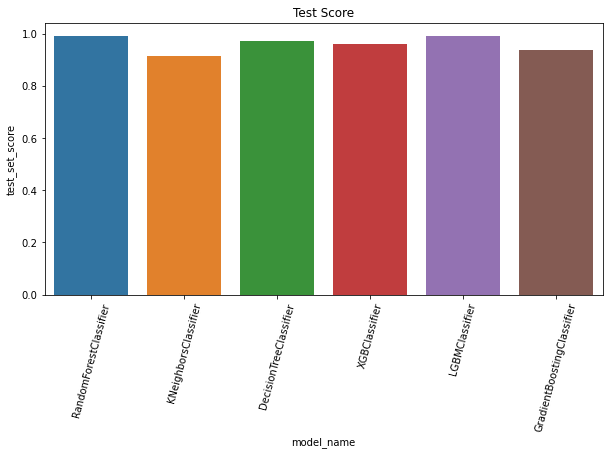

In [59]:
a4_dims = (10,5)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=75)
sns.barplot(x="model_name", y ="test_set_score", data = all_performances, ax=ax);
title = plt.title('Test Score')

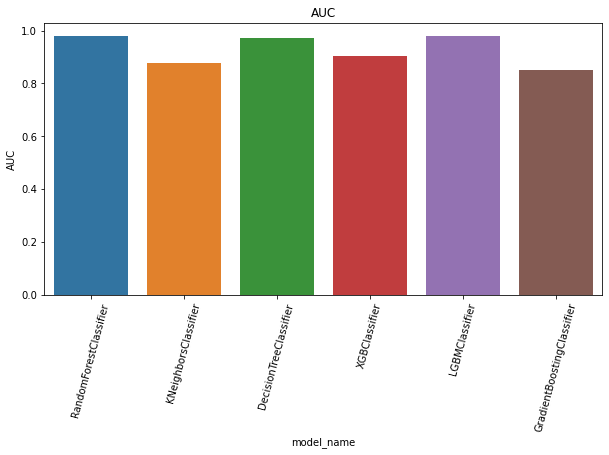

In [60]:
a4_dims = (10,5)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=75)
sns.barplot(x="model_name", y ="AUC", data = all_performances, ax=ax);
title = plt.title('AUC')

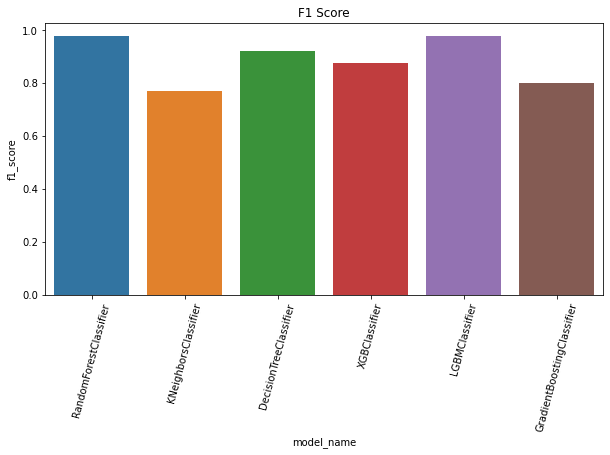

In [61]:
a4_dims = (10,5)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=75)
sns.barplot(x="model_name", y ="f1_score", data = all_performances, ax=ax);
title = plt.title('F1 Score')

## IMPORTANCE SERIES

In [62]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

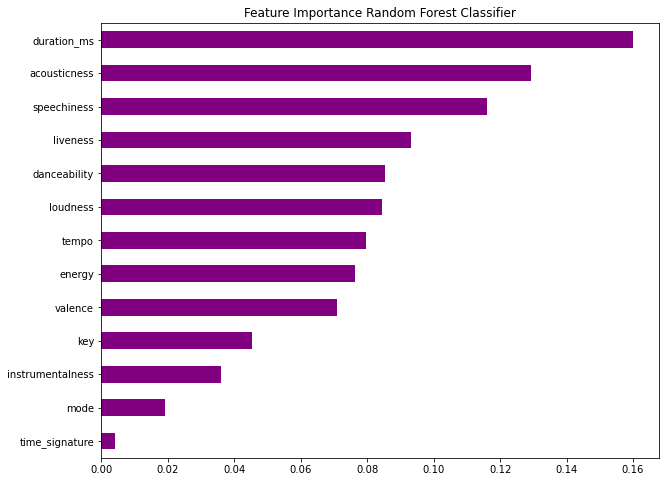

In [63]:
importance_series = pd.Series(data=random_forest_model.feature_importances_, index=X_test.columns)
ax = importance_series.sort_values().plot(kind='barh', figsize=(10,8), color="purple")
ax.set_title('Feature Importance Random Forest Classifier');

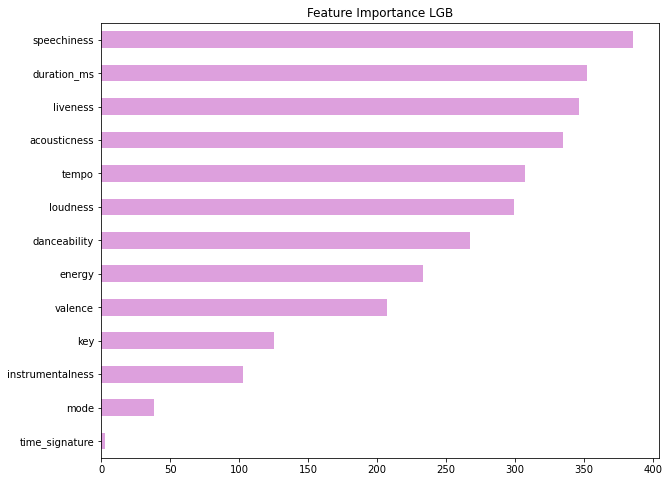

In [64]:
importance_series = pd.Series(data=LGB_model.feature_importances_, index=X_test.columns)
ax = importance_series.sort_values().plot(kind='barh', figsize=(10,8), color="plum")
ax.set_title('Feature Importance LGB');

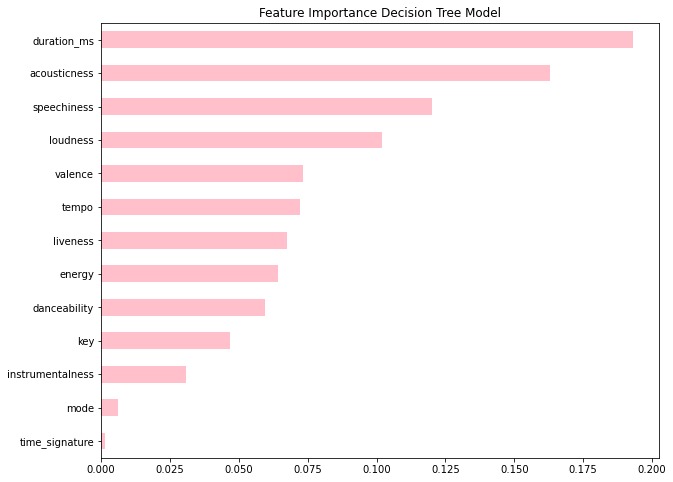

In [65]:
importance_series = pd.Series(data=decision_tree_model.feature_importances_, index=X_test.columns)
ax = importance_series.sort_values().plot(kind='barh', figsize=(10,8), color="pink")
ax.set_title('Feature Importance Decision Tree Model');

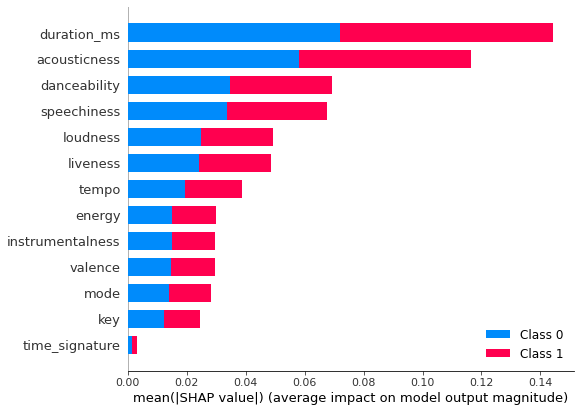

In [66]:
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type = "bar")

# Comparing BTS with Global artists

In [67]:
all_performances = pd.DataFrame()
list_clf_name = []
list_pred = []
list_model = []

In [68]:
df_kpop = kpopgroups.copy()
df_kpop = df_kpop.drop(columns=["Unnamed: 0"])
df_kpop.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.566   0.716    1       0.0424       0.00691               0.0   
1         0.764   0.526   11       0.2120       0.04840               0.0   
2         0.547   0.605    8       0.0415       0.42000               0.0   
3         0.703   0.321    4       0.8840       0.86400               0.0   
4         0.787   0.669    5       0.0428       0.00782               0.0   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.3700    0.450   81.068    -5.733     1       207481               4   
1    0.0718    0.588  114.910    -7.355     1       222243               4   
2    0.1250    0.364  121.953    -6.755     1       254950               4   
3    0.9080    0.544  114.822   -13.135     1       179548               4   
4    0.1230    0.570  104.994    -4.333     0       202313               4   

  artist_name release_date       song_name song_name_formatted  
0         BTS   2020-11-20    Life Goes On        life-goes-on  
1         BTS   2020-11-20  Fly To My Room      fly-to-my-room  
2         BTS   2020-11-20     Blue & Grey           blue-grey  
3         BTS   2020-11-20            Skit                skit  
4         BTS   2020-11-20       Telepathy           telepathy

In [69]:
df.shape

(5984, 14)

In [70]:
global_artists= pd.read_csv("global_artists.csv")
global_artists2 = pd.read_csv("global_artists2.csv")
global_artists= global_artists.append(global_artists2)
global_artists.head()

Unnamed: 0  danceability  energy  key  speechiness  acousticness  \
0           0         0.594   0.713    9       0.0503      0.000328   
1           1         0.516   0.777    1       0.0375      0.001080   
2           2         0.645   0.593    2       0.0288      0.034400   
3           3         0.584   0.557    6       0.0342      0.012900   
4           4         0.440   0.528    0       0.0317      0.017100   

   instrumentalness  liveness  valence    tempo  loudness  mode  duration_ms  \
0          0.000000    0.1140    0.328  129.958    -5.314     1       295413   
1          0.000002    0.0761    0.408  125.047    -4.908     0       223093   
2          0.000127    0.1300    0.299  109.984    -6.506     1       242720   
3          0.000000    0.0576    0.767  154.008    -6.371     1       219760   
4          0.002030    0.2340    0.132  185.972    -7.809     1       329160   

   time_signature   artist_name release_date  \
0               4  Taylor Swift   2021-11-12   
1               4  Taylor Swift   2021-11-12   
2               4  Taylor Swift   2021-11-12   
3               4  Taylor Swift   2021-11-12   
4               4  Taylor Swift   2021-11-12   

                                    song_name      song_name_formatted  
0           State Of Grace (Taylor's Version)           state-of-grace  
1                      Red (Taylor's Version)                      red  
2              Treacherous (Taylor's Version)              treacherous  
3  I Knew You Were Trouble (Taylor's Version)  i-knew-you-were-trouble  
4             All Too Well (Taylor's Version)             all-too-well

In [71]:
global_artists3 = pd.read_csv("global_artists3.csv")
global_artists= global_artists.append(global_artists3)
global_artists.head()

Unnamed: 0  danceability  energy  key  speechiness  acousticness  \
0           0         0.594   0.713    9       0.0503      0.000328   
1           1         0.516   0.777    1       0.0375      0.001080   
2           2         0.645   0.593    2       0.0288      0.034400   
3           3         0.584   0.557    6       0.0342      0.012900   
4           4         0.440   0.528    0       0.0317      0.017100   

   instrumentalness  liveness  valence    tempo  loudness  mode  duration_ms  \
0          0.000000    0.1140    0.328  129.958    -5.314     1       295413   
1          0.000002    0.0761    0.408  125.047    -4.908     0       223093   
2          0.000127    0.1300    0.299  109.984    -6.506     1       242720   
3          0.000000    0.0576    0.767  154.008    -6.371     1       219760   
4          0.002030    0.2340    0.132  185.972    -7.809     1       329160   

   time_signature   artist_name release_date  \
0               4  Taylor Swift   2021-11-12   
1               4  Taylor Swift   2021-11-12   
2               4  Taylor Swift   2021-11-12   
3               4  Taylor Swift   2021-11-12   
4               4  Taylor Swift   2021-11-12   

                                    song_name      song_name_formatted  
0           State Of Grace (Taylor's Version)           state-of-grace  
1                      Red (Taylor's Version)                      red  
2              Treacherous (Taylor's Version)              treacherous  
3  I Knew You Were Trouble (Taylor's Version)  i-knew-you-were-trouble  
4             All Too Well (Taylor's Version)             all-too-well

In [72]:
df_global=global_artists.copy()
df_global.head()

Unnamed: 0  danceability  energy  key  speechiness  acousticness  \
0           0         0.594   0.713    9       0.0503      0.000328   
1           1         0.516   0.777    1       0.0375      0.001080   
2           2         0.645   0.593    2       0.0288      0.034400   
3           3         0.584   0.557    6       0.0342      0.012900   
4           4         0.440   0.528    0       0.0317      0.017100   

   instrumentalness  liveness  valence    tempo  loudness  mode  duration_ms  \
0          0.000000    0.1140    0.328  129.958    -5.314     1       295413   
1          0.000002    0.0761    0.408  125.047    -4.908     0       223093   
2          0.000127    0.1300    0.299  109.984    -6.506     1       242720   
3          0.000000    0.0576    0.767  154.008    -6.371     1       219760   
4          0.002030    0.2340    0.132  185.972    -7.809     1       329160   

   time_signature   artist_name release_date  \
0               4  Taylor Swift   2021-11-12   
1               4  Taylor Swift   2021-11-12   
2               4  Taylor Swift   2021-11-12   
3               4  Taylor Swift   2021-11-12   
4               4  Taylor Swift   2021-11-12   

                                    song_name      song_name_formatted  
0           State Of Grace (Taylor's Version)           state-of-grace  
1                      Red (Taylor's Version)                      red  
2              Treacherous (Taylor's Version)              treacherous  
3  I Knew You Were Trouble (Taylor's Version)  i-knew-you-were-trouble  
4             All Too Well (Taylor's Version)             all-too-well

In [73]:
df_global = df_global.drop(columns=["Unnamed: 0"])
df_global.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.594   0.713    9       0.0503      0.000328          0.000000   
1         0.516   0.777    1       0.0375      0.001080          0.000002   
2         0.645   0.593    2       0.0288      0.034400          0.000127   
3         0.584   0.557    6       0.0342      0.012900          0.000000   
4         0.440   0.528    0       0.0317      0.017100          0.002030   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.1140    0.328  129.958    -5.314     1       295413               4   
1    0.0761    0.408  125.047    -4.908     0       223093               4   
2    0.1300    0.299  109.984    -6.506     1       242720               4   
3    0.0576    0.767  154.008    -6.371     1       219760               4   
4    0.2340    0.132  185.972    -7.809     1       329160               4   

    artist_name release_date                                   song_name  \
0  Taylor Swift   2021-11-12           State Of Grace (Taylor's Version)   
1  Taylor Swift   2021-11-12                      Red (Taylor's Version)   
2  Taylor Swift   2021-11-12              Treacherous (Taylor's Version)   
3  Taylor Swift   2021-11-12  I Knew You Were Trouble (Taylor's Version)   
4  Taylor Swift   2021-11-12             All Too Well (Taylor's Version)   

       song_name_formatted  
0           state-of-grace  
1                      red  
2              treacherous  
3  i-knew-you-were-trouble  
4             all-too-well

In [74]:
df_global.shape

(5560, 17)

In [75]:
df_global.artist_name.value_counts()

Taylor Swift      971
Eminem            920
Rihanna           647
Drake             621
Justin Bieber     487
Ariana Grande     460
Adele             428
The Weeknd        388
Ed Sheeran        378
Arctic Monkeys    260
Name: artist_name, dtype: int64

In [76]:
df_all = df_kpop[df_kpop.artist_name == 'BTS']
df_all = df_all.append(df_global)
df_all.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.566   0.716    1       0.0424       0.00691               0.0   
1         0.764   0.526   11       0.2120       0.04840               0.0   
2         0.547   0.605    8       0.0415       0.42000               0.0   
3         0.703   0.321    4       0.8840       0.86400               0.0   
4         0.787   0.669    5       0.0428       0.00782               0.0   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.3700    0.450   81.068    -5.733     1       207481               4   
1    0.0718    0.588  114.910    -7.355     1       222243               4   
2    0.1250    0.364  121.953    -6.755     1       254950               4   
3    0.9080    0.544  114.822   -13.135     1       179548               4   
4    0.1230    0.570  104.994    -4.333     0       202313               4   

  artist_name release_date       song_name song_name_formatted  
0         BTS   2020-11-20    Life Goes On        life-goes-on  
1         BTS   2020-11-20  Fly To My Room      fly-to-my-room  
2         BTS   2020-11-20     Blue & Grey           blue-grey  
3         BTS   2020-11-20            Skit                skit  
4         BTS   2020-11-20       Telepathy           telepathy

In [77]:
df_all.shape

(6554, 17)

Text(0.5, 0.98, 'Overview All Song Features (Global Artists)')

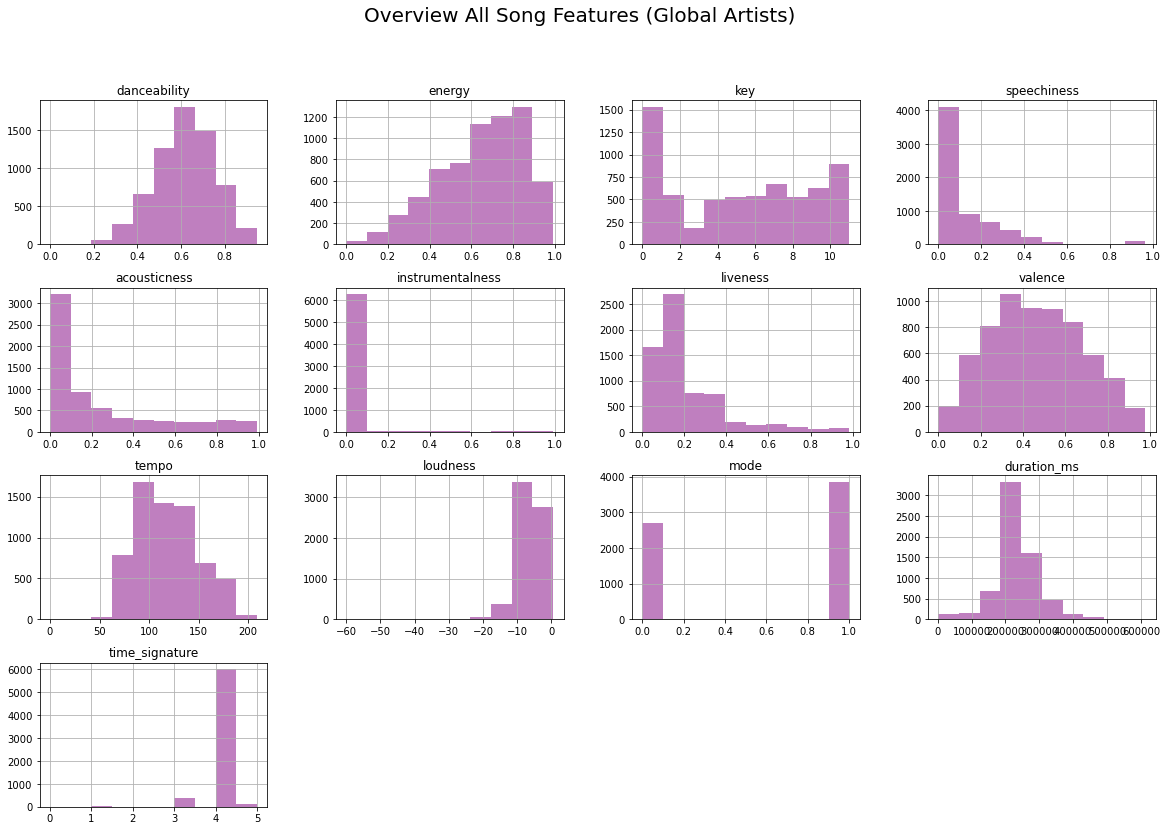

In [78]:
figure = figsize(20,13)
df_all.hist(alpha = 0.5, color="purple");
suptitle("Overview All Song Features (Global Artists)", size=20)

In [79]:
df_all['target'] = [1 if i == 'BTS' else 0 for i in df_all.artist_name]
df_all.groupby('artist_name').agg({'speechiness':'mean', 'instrumentalness':'mean', 'danceability':'mean', 'energy':'mean','acousticness':'mean'}).sort_values('speechiness', ascending = False)

speechiness  instrumentalness  danceability    energy  \
artist_name                                                             
Eminem             0.297215          0.009311      0.702005  0.738294   
Drake              0.231890          0.006685      0.633372  0.555948   
BTS                0.140292          0.005332      0.607638  0.763520   
Taylor Swift       0.107880          0.089769      0.592625  0.569299   
Ariana Grande      0.092526          0.009178      0.622043  0.621461   
Ed Sheeran         0.083468          0.005546      0.668132  0.564395   
Rihanna            0.081202          0.012052      0.617754  0.681196   
Justin Bieber      0.075608          0.001821      0.612772  0.604932   
The Weeknd         0.071607          0.017332      0.562080  0.609044   
Arctic Monkeys     0.066046          0.057925      0.468819  0.779313   
Adele              0.056858          0.061656      0.575287  0.556913   

                acousticness  
artist_name                   
Eminem              0.199178  
Drake               0.234449  
BTS                 0.111164  
Taylor Swift        0.335038  
Ariana Grande       0.223222  
Ed Sheeran          0.401881  
Rihanna             0.148767  
Justin Bieber       0.275556  
The Weeknd          0.252527  
Arctic Monkeys      0.083954  
Adele               0.393310

In [80]:
df_all = df_all.drop(columns=["release_date","artist_name","song_name_formatted","song_name"])
df_all.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.566   0.716    1       0.0424       0.00691               0.0   
1         0.764   0.526   11       0.2120       0.04840               0.0   
2         0.547   0.605    8       0.0415       0.42000               0.0   
3         0.703   0.321    4       0.8840       0.86400               0.0   
4         0.787   0.669    5       0.0428       0.00782               0.0   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.3700    0.450   81.068    -5.733     1       207481               4   
1    0.0718    0.588  114.910    -7.355     1       222243               4   
2    0.1250    0.364  121.953    -6.755     1       254950               4   
3    0.9080    0.544  114.822   -13.135     1       179548               4   
4    0.1230    0.570  104.994    -4.333     0       202313               4   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

## Splitting Data-Set

In [81]:
y = df_all.target
X = df_all.drop("target",axis=1)
#X, y

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 10)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:", y_train.shape)
print("t_test shape:", y_test.shape)

X_train shape: (4915, 13)
X_test shape: (1639, 13)
y_train shape: (4915,)
t_test shape: (1639,)


## Creating Models

In [83]:
rf_model = RandomForestClassifier()
model_performance(rf_model)

Training Score:  1.0
Test Score:  0.987797437461867
AUC:  0.9616858237547893 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1378
           1       1.00      0.92      0.96       261

    accuracy                           0.99      1639
   macro avg       0.99      0.96      0.98      1639
weighted avg       0.99      0.99      0.99      1639



In [84]:
knn_model = KNeighborsClassifier()
model_performance(knn_model)

Training Score:  0.9538148524923703
Test Score:  0.9286150091519219
AUC:  0.862822459113936 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1378
           1       0.78      0.77      0.77       261

    accuracy                           0.93      1639
   macro avg       0.87      0.86      0.87      1639
weighted avg       0.93      0.93      0.93      1639



In [85]:
decision_tree_model = DecisionTreeClassifier()
model_performance(decision_tree_model)

Training Score:  1.0
Test Score:  0.9792556436851739
AUC:  0.9721346390181784 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1378
           1       0.91      0.96      0.94       261

    accuracy                           0.98      1639
   macro avg       0.95      0.97      0.96      1639
weighted avg       0.98      0.98      0.98      1639



In [86]:
XGB_model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
model_performance(XGB_model)

[11:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score:  0.9747711088504578
Test Score:  0.9481391092129348
AUC:  0.8651163049341318 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1378
           1       0.92      0.74      0.82       261

    accuracy                           0.95      1639
   macro avg       0.93      0.87      0.89      1639
weighted avg       0.95      0.95      0.95      1639



The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [87]:
LGB_model = lgb.LGBMClassifier()
model_performance(LGB_model)

Training Score:  1.0
Test Score:  0.9835265405735204
AUC:  0.9653573672766905 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1378
           1       0.96      0.94      0.95       261

    accuracy                           0.98      1639
   macro avg       0.97      0.97      0.97      1639
weighted avg       0.98      0.98      0.98      1639



In [88]:
GCB_model = GradientBoostingClassifier()
model_performance(GCB_model)

Training Score:  0.9489318413021364
Test Score:  0.9219035997559487
AUC:  0.7873994183363084 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1378
           1       0.88      0.59      0.71       261

    accuracy                           0.92      1639
   macro avg       0.90      0.79      0.83      1639
weighted avg       0.92      0.92      0.92      1639



## Comparing Performances

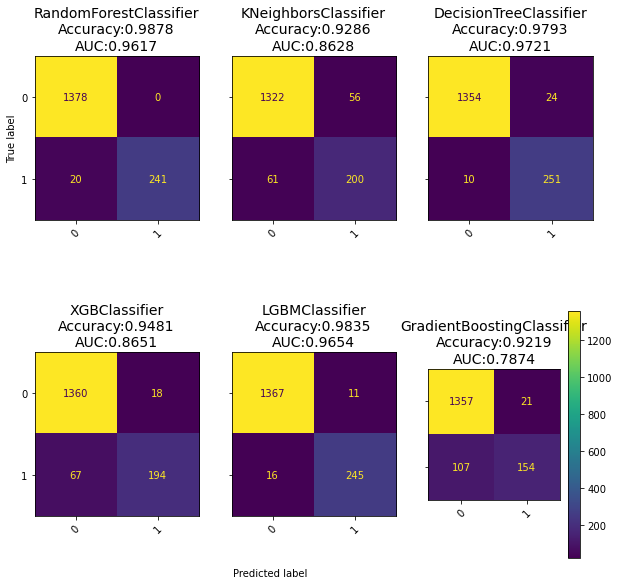

In [89]:
display_all_confusion_matrices()

In [90]:
all_performances.sort_values(by=['test_set_score'], ascending=False)

model_name  training_set_score  test_set_score  precision  \
0      RandomForestClassifier            1.000000        0.987797   1.000000   
4              LGBMClassifier            1.000000        0.983527   0.957031   
2      DecisionTreeClassifier            1.000000        0.979256   0.912727   
3               XGBClassifier            0.974771        0.948139   0.915094   
1        KNeighborsClassifier            0.953815        0.928615   0.781250   
5  GradientBoostingClassifier            0.948932        0.921904   0.880000   

     recall  f1_score       AUC  
0  0.923372  0.960159  0.961686  
4  0.938697  0.947776  0.965357  
2  0.961686  0.936567  0.972135  
3  0.743295  0.820296  0.865116  
1  0.766284  0.773694  0.862822  
5  0.590038  0.706422  0.787399

In [91]:
all_performances.sort_values(by=['f1_score'], ascending=False)

model_name  training_set_score  test_set_score  precision  \
0      RandomForestClassifier            1.000000        0.987797   1.000000   
4              LGBMClassifier            1.000000        0.983527   0.957031   
2      DecisionTreeClassifier            1.000000        0.979256   0.912727   
3               XGBClassifier            0.974771        0.948139   0.915094   
1        KNeighborsClassifier            0.953815        0.928615   0.781250   
5  GradientBoostingClassifier            0.948932        0.921904   0.880000   

     recall  f1_score       AUC  
0  0.923372  0.960159  0.961686  
4  0.938697  0.947776  0.965357  
2  0.961686  0.936567  0.972135  
3  0.743295  0.820296  0.865116  
1  0.766284  0.773694  0.862822  
5  0.590038  0.706422  0.787399

In [92]:
all_performances.sort_values(by=['AUC'], ascending=False)

model_name  training_set_score  test_set_score  precision  \
2      DecisionTreeClassifier            1.000000        0.979256   0.912727   
4              LGBMClassifier            1.000000        0.983527   0.957031   
0      RandomForestClassifier            1.000000        0.987797   1.000000   
3               XGBClassifier            0.974771        0.948139   0.915094   
1        KNeighborsClassifier            0.953815        0.928615   0.781250   
5  GradientBoostingClassifier            0.948932        0.921904   0.880000   

     recall  f1_score       AUC  
2  0.961686  0.936567  0.972135  
4  0.938697  0.947776  0.965357  
0  0.923372  0.960159  0.961686  
3  0.743295  0.820296  0.865116  
1  0.766284  0.773694  0.862822  
5  0.590038  0.706422  0.787399

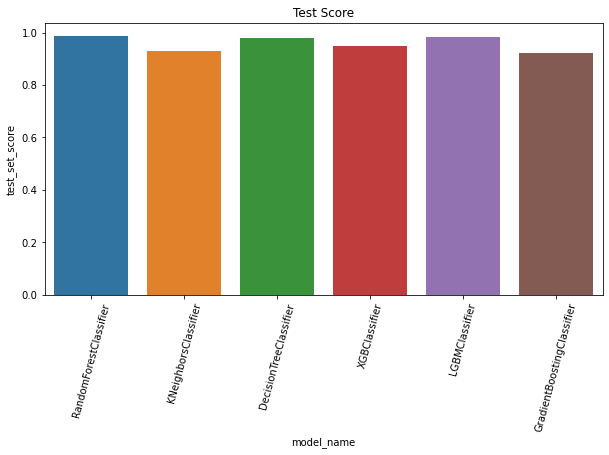

In [93]:
a4_dims = (10,5)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=75)
sns.barplot(x="model_name", y ="test_set_score", data = all_performances, ax=ax);
title = plt.title('Test Score')

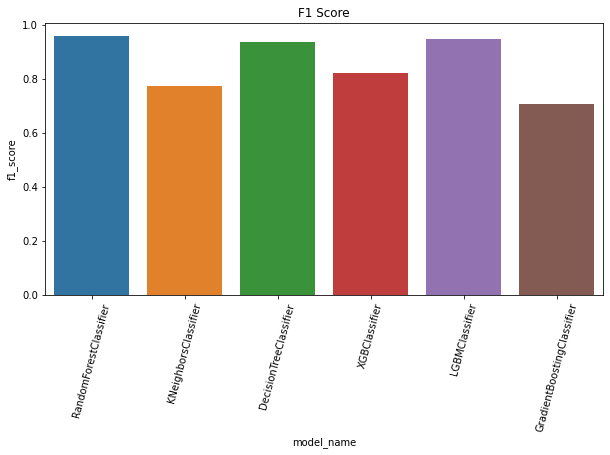

In [94]:
a4_dims = (10,5)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=75)
sns.barplot(x="model_name", y ="f1_score", data = all_performances, ax=ax);
title = plt.title('F1 Score')

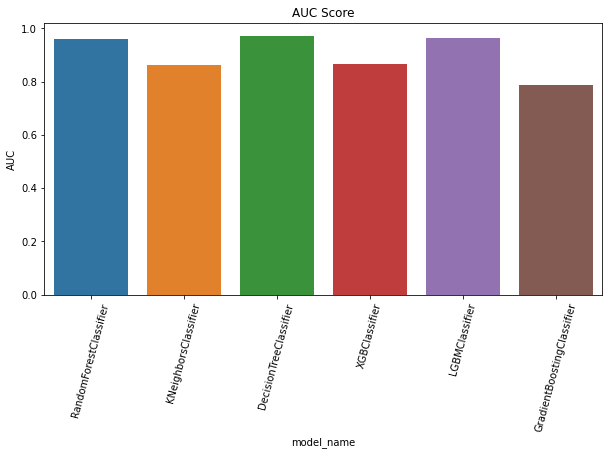

In [95]:
a4_dims = (10,5)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=75)
sns.barplot(x="model_name", y ="AUC", data = all_performances, ax=ax);
title = plt.title('AUC Score')